# Bank Churn Prediction

## Background:
   This is my personal project to reenforce the concepts of classification algorith I learned. The bank churn data is downloaded from kaggle. I will be utilizing classification algorithms like Logistic Regression, Decision Tree, Random Forest, and K-Nearest Neighbors to train models.
## Goal:
- **Create a classification model that can accuarately predict a customer's likelihood to stay or leave the bank**

## Phases:
- **Planning**
- **Data Acquisition**
- **Data Preparation**
- **Exploration**
- **Modeling**
- **Evaluating**
- **Conclusion**

### Data Acquisiton
- **Acquired from Kaggle**
- **Data Dictionary:**
    - **CustomerId:** A unique identifier for each customer
    - **Surname:** Customer's last name
    - **CreditScore:** Customer's credit score
    - **Geography:** Country where the customer is from
    - **Gender:** Customer's gender
    - **Age:** Customer's age
    - **Tenure:** Length(in years) customer has been with the company 
    - **Balance:** Total balance in customer's account
    - **NumOfProducts:** No of bank products customer is using
    - **HasCrCard:** Whether a customer has a credit card or not
    - **IsActiveMember:** Whether a customer is an active member of the bank or not
    - **EstimatedSalary:** Customer's estimated salary(yearly)
    - **Exited:** Whether the customer has exited the bank or not

In [1]:
# getting all the necessary imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading our csv bank data as a data frame

df = pd.read_csv('bank_churn_data.csv')

In [3]:
# lets take a quick look into our data

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Preparation

In [4]:
# lets get some information about our data


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# checking if there are any duplicate values

df.duplicated().sum()

0

**Takeaways:**
   - Total of 10000 entries with 14 columns
   - No null values
   - Few columns with data type objects which can either be dropped or encoded to numeric data type
   - No duplicate values
   - Row number should be dropped

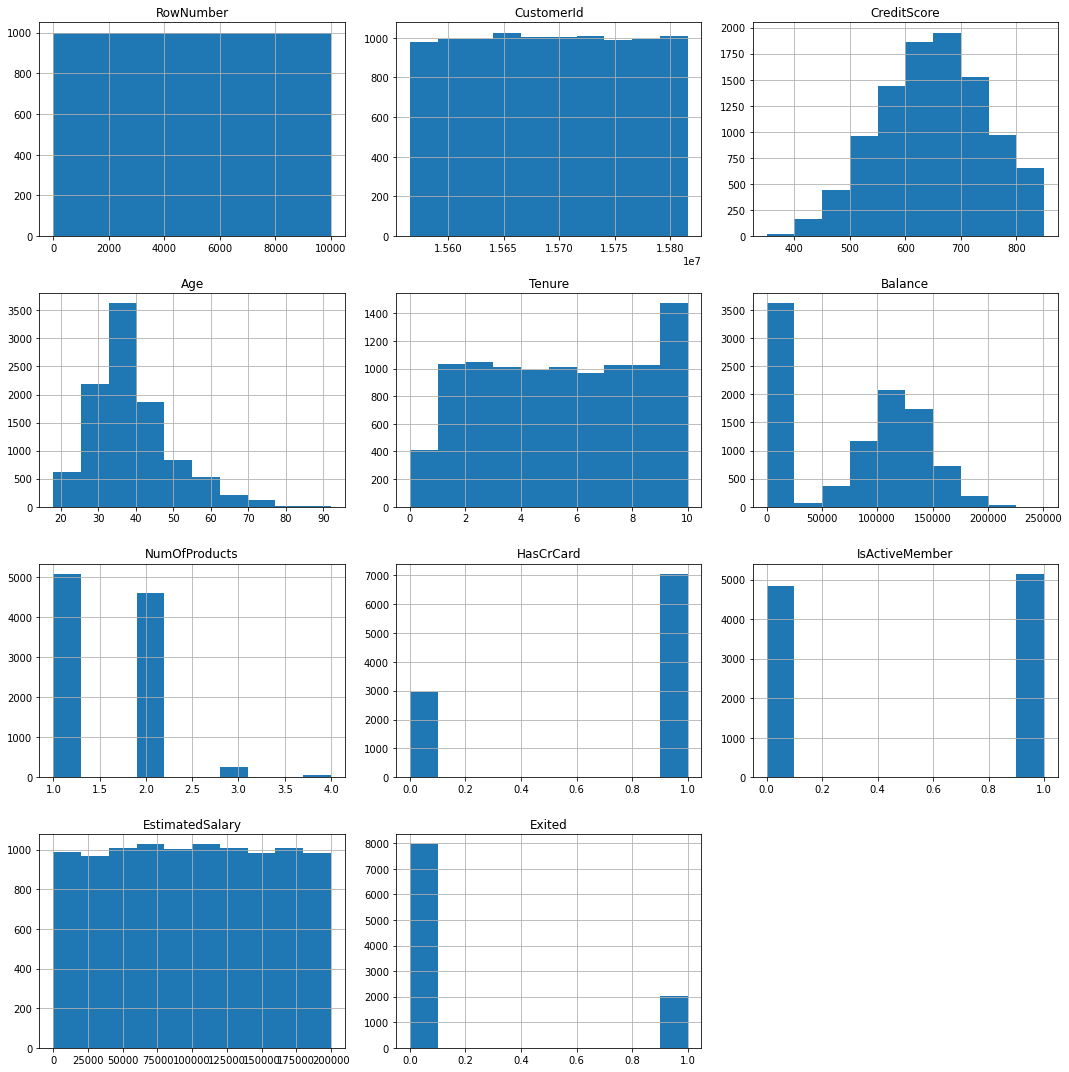

In [6]:
df.hist(figsize = (15,15))
plt.tight_layout()
plt.show()

In [7]:
# lets check the number of unique entries for each column
# this gives us an idea that if we should drop column or not

df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

**Takeaways:**
- Row number should be dropped
- Surname should be dropped
- Encode geography to numeric using get dummies
- drop custpmer id
- we will eventually scale all of this data

In [8]:
# lets drop the columns that we wont need

df = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# lets get the value counts for each columns

for col in df.columns:
    print(df[col].value_counts())
    print('')

850    233
678     63
655     54
705     53
667     53
      ... 
419      1
417      1
373      1
365      1
401      1
Name: CreditScore, Length: 460, dtype: int64

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Male      5457
Female    4543
Name: Gender, dtype: int64

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

0.00         3617
105473.74       2
130170.82       2
113063.83       1
80242.37        1
             ... 
183555.24       1
137648.41       1
112689.95       1
115465.28       1
74681.90        1
Name: Balance, Length: 6382, dtype: int64

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

1    7055
0    2945
Name: HasCrCard, dtype: int64

1    5151
0    4849
Name: IsActiv

In [11]:
# lets do some data conversion
df = pd.concat([df, pd.get_dummies(df.Geography)], axis = 1)

In [12]:
# dropping the repeated column

df = df.drop(columns = 'Geography')

In [13]:
df = pd.concat([df, pd.get_dummies(df.Gender, drop_first = True)], axis = 1)

In [14]:
# dropping repeated columns
df = df.drop(columns = 'Gender')

In [15]:
# all of your column are of numeric data type


df.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
France               uint8
Germany              uint8
Spain                uint8
Male                 uint8
dtype: object

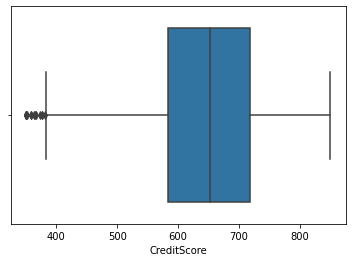

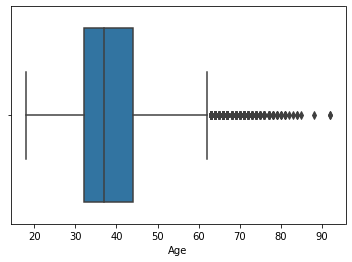

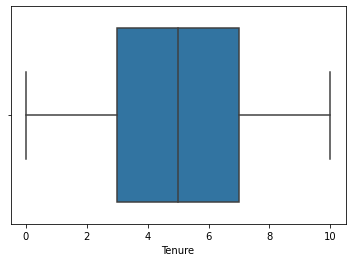

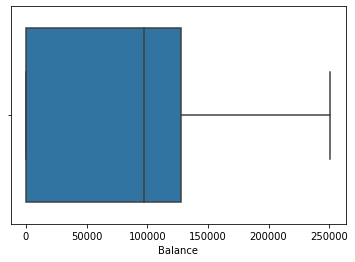

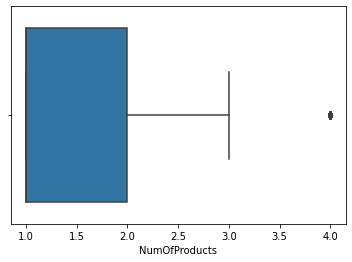

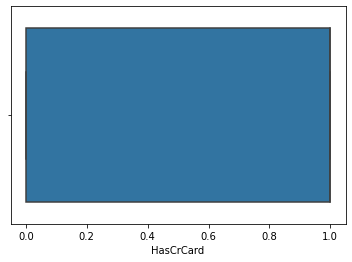

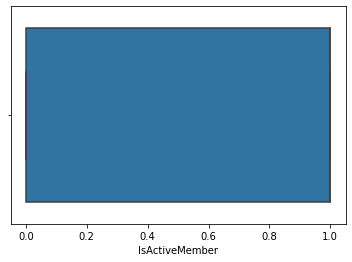

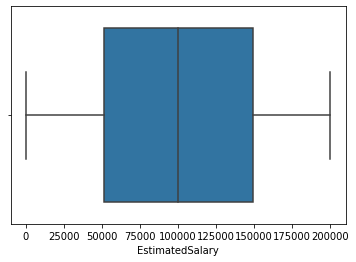

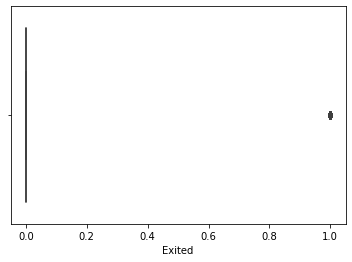

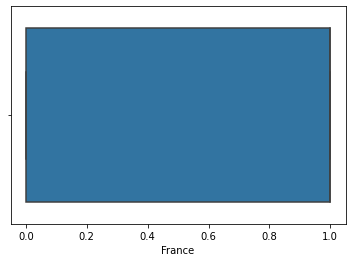

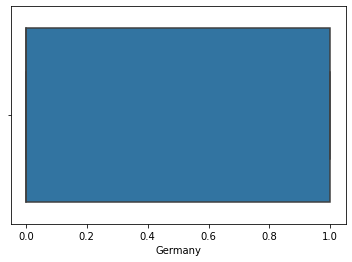

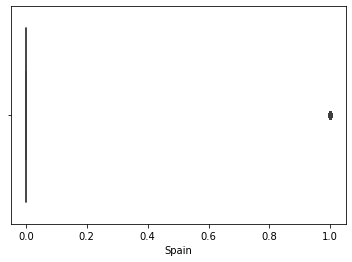

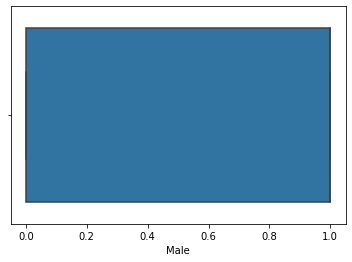

In [16]:
# checking for ouliers using boxplot

for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

**Takeaways:**
- There are outliers for few columns but all the value seem normal. So, we will keep them

In [17]:
## Lets split our data now. But before we do that lets see if we need to stratify our target variable


df.Exited.value_counts()

# we might have to stratify to ensure fair representation

0    7963
1    2037
Name: Exited, dtype: int64

In [18]:
# now lets split


train_validate, test = train_test_split(df, test_size = 0.15, random_state = 123, stratify = df.Exited)

train, validate = train_test_split(train_validate, test_size = 0.15, random_state = 123, stratify = train_validate.Exited)

train.shape, test.shape, validate.shape

((7225, 13), (1500, 13), (1275, 13))

### Data Exploration

In [19]:
train.shape
train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Male
6773,625,43,4,122351.29,1,1,0,71216.60,0,1,0,0,1
302,687,35,8,0.00,2,1,0,10334.05,0,1,0,0,1
5179,760,34,6,121303.77,2,1,1,59325.21,0,0,1,0,1
2591,634,38,2,148430.55,1,1,1,56055.72,0,0,1,0,1
1142,793,41,9,0.00,2,1,0,152153.74,0,0,0,1,1


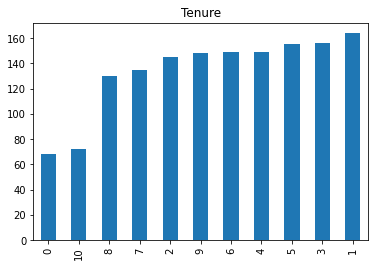

1     164
3     156
5     155
6     149
4     149
9     148
2     145
7     135
8     130
10     72
0      68
Name: Tenure, dtype: int64



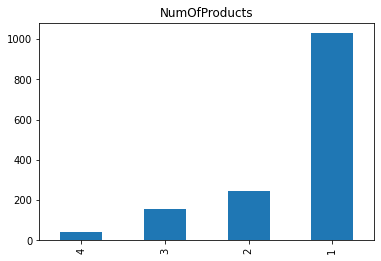

1    1029
2     248
3     154
4      40
Name: NumOfProducts, dtype: int64



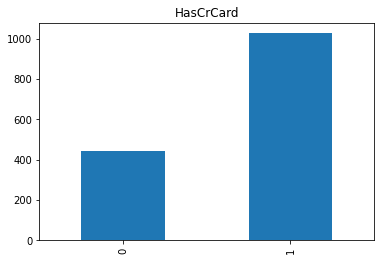

1    1026
0     445
Name: HasCrCard, dtype: int64



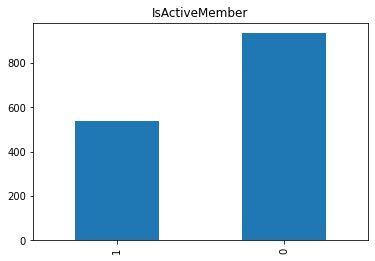

0    934
1    537
Name: IsActiveMember, dtype: int64



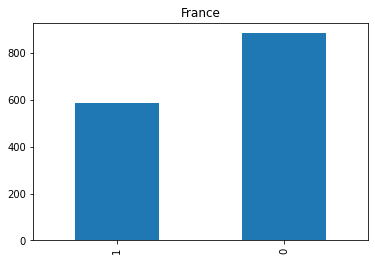

0    884
1    587
Name: France, dtype: int64



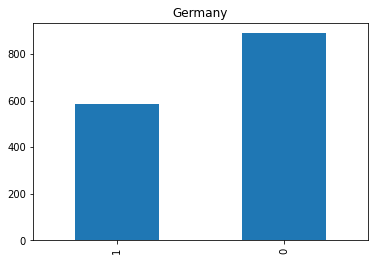

0    888
1    583
Name: Germany, dtype: int64



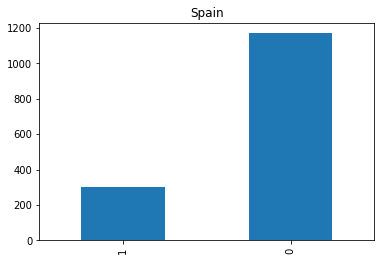

0    1170
1     301
Name: Spain, dtype: int64



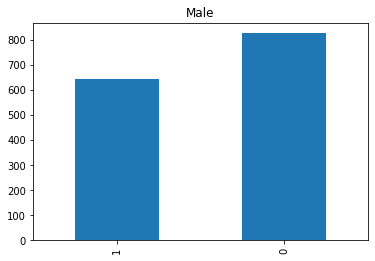

0    827
1    644
Name: Male, dtype: int64



In [20]:
# lets find out if there are any drivers behind customers leaving the bank



cat_var = ['NumOfProducts','Tenure', 'HasCrCard','IsActiveMember', 'France','Germany','Spain', 'Male']
for col in train[train.Exited == 1].columns:
    if col in cat_var:
        
        train[train.Exited == 1][col].value_counts().sort_values(ascending = True).plot(kind = 'bar')
        plt.title(col)
        plt.show()
        
        print(train[train.Exited == 1][col].value_counts())
        print()
        

**Takeaways:**
- There is a clear relationship between number of products a customer has and their liklihood of leaving the bank
- There is a clear relationsip between a customer having a credit card and their liklihood of leaving the bank
- Whether a customer is a active member or not can tell if they will leave the bank upto certain extent
- Customer from France and Germany are more likely to leave compared to customer from Spain
- Female customers are more likely to leave compared to male

In [21]:
# binning the credit score to 5 different ranges

train['credit_range'] = pd.cut(train.CreditScore, bins = 5 )

(550.0, 650.0]    507
(650.0, 750.0]    477
(450.0, 550.0]    229
(750.0, 850.0]    215
(349.5, 450.0]     43
Name: credit_range, dtype: int64


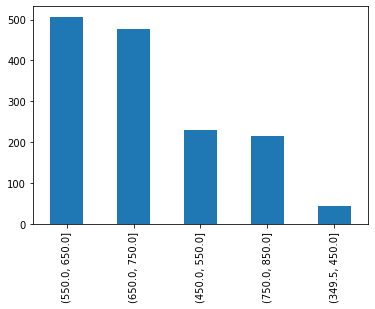

In [22]:
# getting the count of people within different credit range whho exited the bank

train[train.Exited == 1].credit_range.value_counts().plot(kind = 'bar')
print(train[train.Exited == 1].credit_range.value_counts())

In [23]:
# getting the count
train.credit_range.value_counts()

(650.0, 750.0]    2482
(550.0, 650.0]    2419
(750.0, 850.0]    1145
(450.0, 550.0]    1046
(349.5, 450.0]     133
Name: credit_range, dtype: int64

<AxesSubplot:xlabel='Exited'>

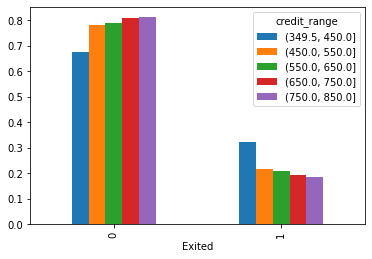

In [24]:
# lets get a graph of the corsstab of customers leaving and their credit range

pd.crosstab(train.Exited, train.credit_range, normalize = 'columns').plot(kind = 'bar')





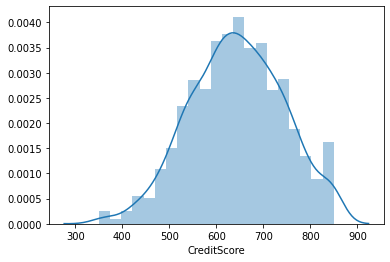

<AxesSubplot:xlabel='CreditScore'>

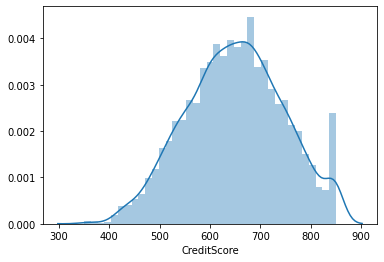

In [25]:
sns.distplot(train[train.Exited == 1].CreditScore)
plt.show()

sns.distplot(train.CreditScore)

In [26]:
train['balance_range'] = pd.cut(train.Balance, bins = 10)

In [27]:
train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Male,credit_range,balance_range
6773,625,43,4,122351.29,1,1,0,71216.60,0,1,0,0,1,"(550.0, 650.0]","(119193.78, 143032.536]"
302,687,35,8,0.00,2,1,0,10334.05,0,1,0,0,1,"(650.0, 750.0]","(-238.388, 23838.756]"
5179,760,34,6,121303.77,2,1,1,59325.21,0,0,1,0,1,"(750.0, 850.0]","(119193.78, 143032.536]"
2591,634,38,2,148430.55,1,1,1,56055.72,0,0,1,0,1,"(550.0, 650.0]","(143032.536, 166871.292]"
1142,793,41,9,0.00,2,1,0,152153.74,0,0,0,1,1,"(750.0, 850.0]","(-238.388, 23838.756]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,620,29,1,138740.24,2,0,0,154700.61,0,1,0,0,0,"(550.0, 650.0]","(119193.78, 143032.536]"
1487,710,51,4,93656.95,1,0,1,141400.51,1,0,0,1,0,"(650.0, 750.0]","(71516.268, 95355.024]"
742,635,29,7,105405.97,1,1,1,149853.89,0,1,0,0,1,"(550.0, 650.0]","(95355.024, 119193.78]"
5013,672,40,3,0.00,1,1,0,113171.61,1,1,0,0,0,"(650.0, 750.0]","(-238.388, 23838.756]"


<AxesSubplot:>

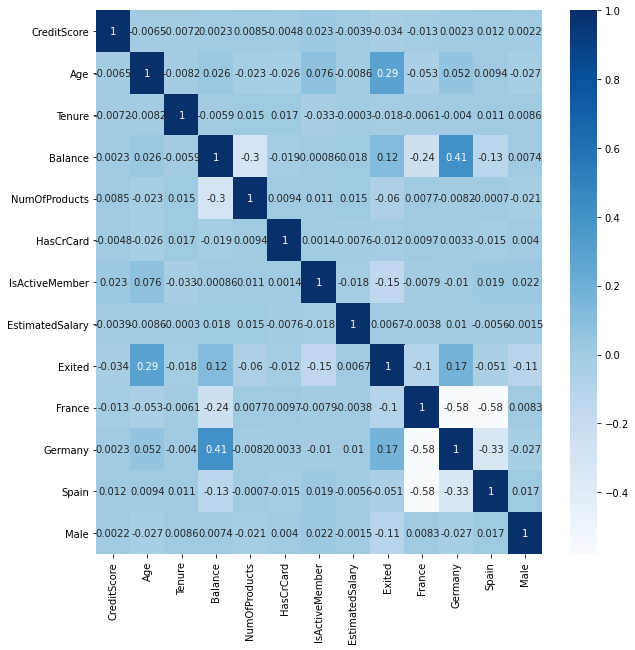

In [28]:
# lets check out the correlation
plt.figure(figsize = (10,10))
sns.heatmap(train.corr(), cmap = 'Blues', annot = True)

<AxesSubplot:xlabel='Exited'>

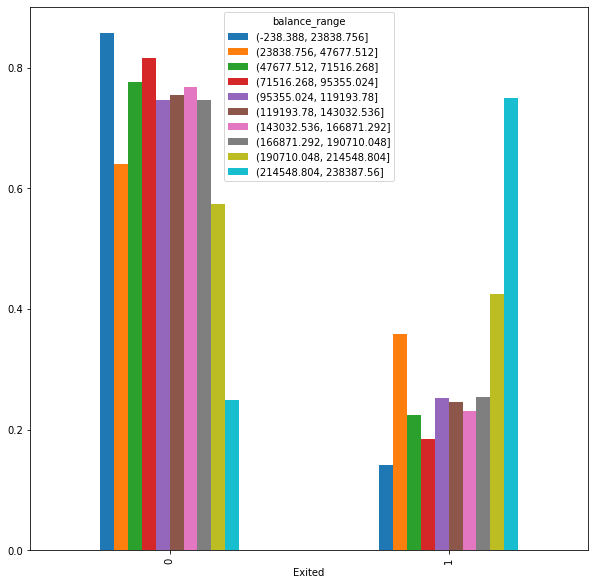

In [29]:
# plt.figure(figsize = (15,15))
# pd.crosstab(train.Exited, train.balance_range, normalize = 'columns').plot(kind = 'bar')


pd.crosstab(train.Exited, train.balance_range, normalize = 'columns').plot(kind = 'bar', figsize = (10,10))

<AxesSubplot:xlabel='Balance'>

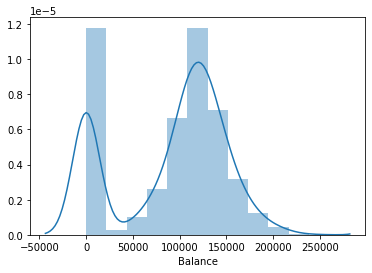

In [30]:
sns.distplot(train[train.Exited == 1].Balance)

<AxesSubplot:xlabel='EstimatedSalary'>

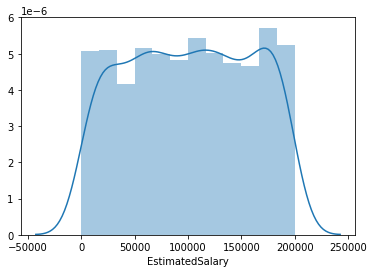

In [31]:
sns.distplot(train[train.Exited == 1].EstimatedSalary)

<AxesSubplot:xlabel='EstimatedSalary'>

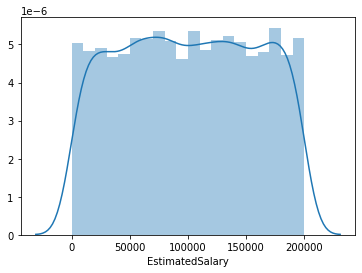

In [32]:
sns.distplot(train.EstimatedSalary)

In [33]:
train['salary_range'] = pd.cut(train.EstimatedSalary, bins = 10)

<AxesSubplot:xlabel='Exited'>

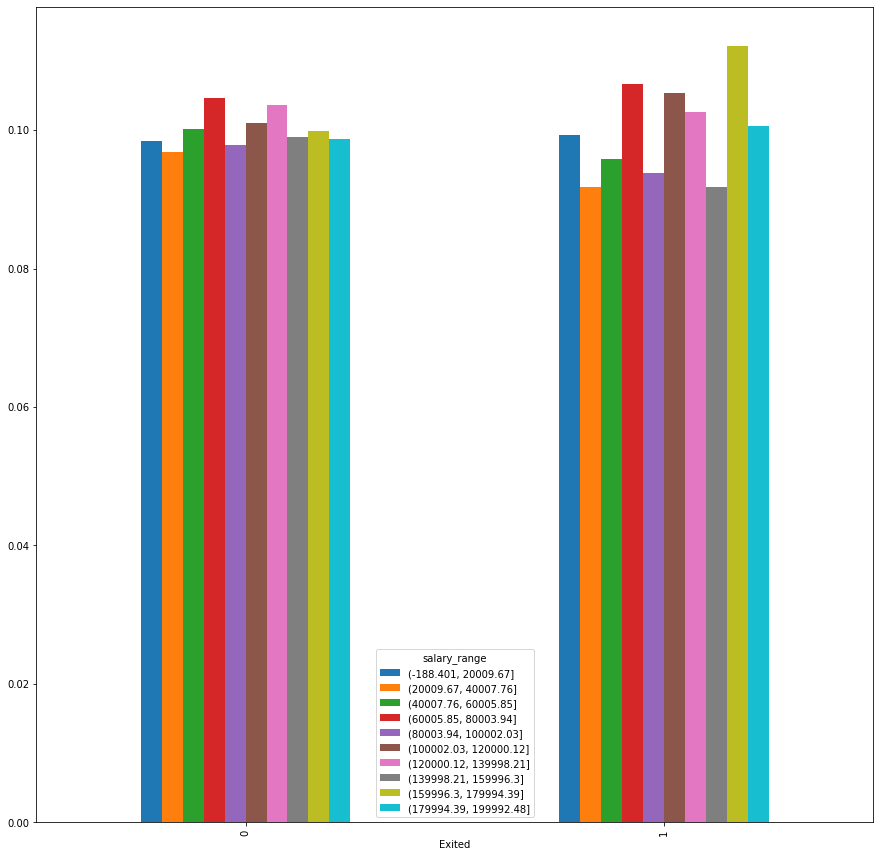

In [34]:
pd.crosstab(train.Exited, train.salary_range, normalize = 'index').plot(kind = 'bar', figsize = (15,15))

**Takeaways**
- Salary does not influence a customers liklihood of exiting

<AxesSubplot:>

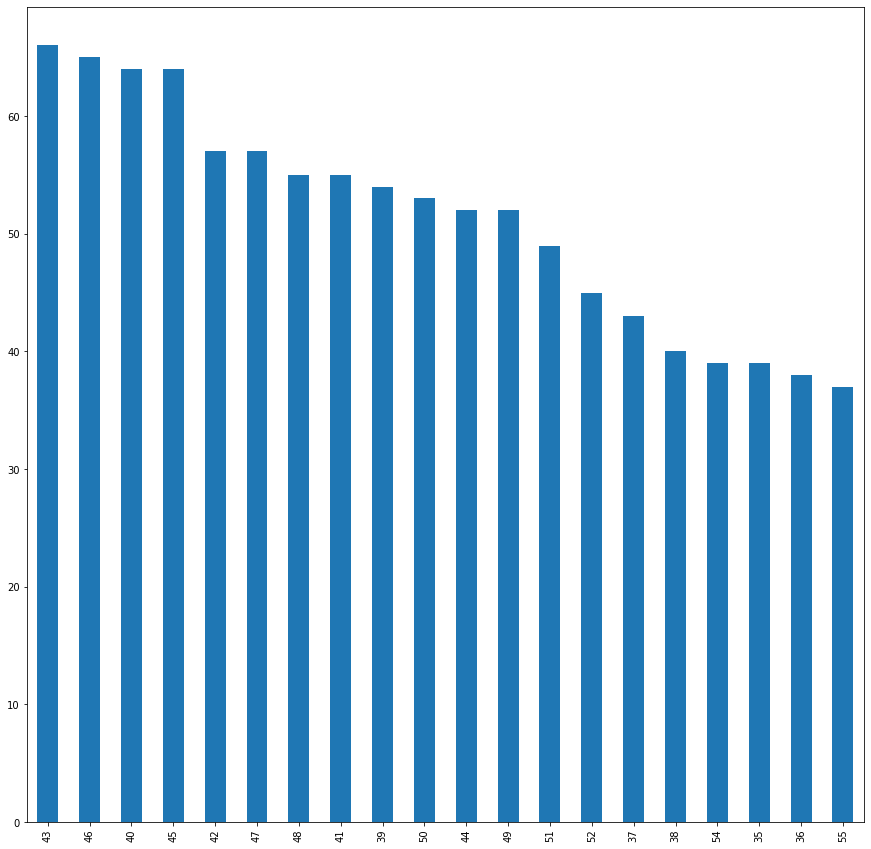

In [35]:
train[train.Exited ==1].Age.value_counts().head(20).plot(kind = 'bar', figsize = (15,15))

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
# creating a function that outputs a dataframe with a column of variable names and column with their 
# variance inflation factor


# Variance inflation factor score determines if the variable can be explained by another variables. Meaning the variale is correlated to 
#  other variables



def vif(x):
    vif = pd.DataFrame()
    vif['Variables'] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)

In [38]:
vif(train.drop(columns = [ 'credit_range', 'salary_range','NumOfProducts', 'balance_range', 'Spain','France','Germany','Age','CreditScore']))

,Variables,VIF
0,Tenure,3.115062
1,Balance,2.283477
2,HasCrCard,2.821492
3,IsActiveMember,1.884373
4,EstimatedSalary,3.143536
5,Exited,1.272569
6,Male,2.031323


In [39]:
# lets scale our data but lets separate our independent and dependent variables

x_train = train.drop(columns = ['Exited','salary_range', 'credit_range', 'balance_range'])
y_train = train[['Exited']]

x_validate = validate.drop(columns = 'Exited')
y_validate = validate[['Exited']]


x_test = test.drop(columns = 'Exited')
y_test = test[['Exited']]




In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
# creating our minmax scaler object

scaler = MinMaxScaler()


# fitting our scaler with the x_train
scaler = scaler.fit(x_train)


# transforming our dataset with the scaler

x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns = x_train.columns, index = x_train.index)

In [42]:
# transforming the validate data

x_validate_scaled = pd.DataFrame(scaler.transform(x_validate), 
                                 columns = x_validate.columns, index = x_validate.index)


# transforming the test data
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns,
                             index = x_test.index)

## Lets Start Modeling

**But first, we must create a baseline**

In [43]:
# Baseline for classification project is the liklihood of an event with the most frequency occuring


train.Exited.value_counts(normalize = True)

0    0.796401
1    0.203599
Name: Exited, dtype: float64

### so our baseline model's accuracy is 80%

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

### Logit Model 1

In [45]:
x_train_scaled.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Male
6773,0.55,0.357143,0.4,0.513245,0.0,1.0,0.0,0.356059,1.0,0.0,0.0,1.0


In [46]:
# getting our X variables for our model

x_var = x_train_scaled.drop(columns = [ 'Age', 'Tenure', 'Balance', 'EstimatedSalary'])

# creating our model

logit = LogisticRegression(random_state = 123, C = 1)

In [47]:
logit

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
# fitting our model

logit = logit.fit(x_var, y_train)

In [49]:
# predicting y value using our model

y_train_pred = logit.predict(x_var)


In [50]:
# getting classification report

print(classification_report( y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      5754
           1       0.57      0.05      0.09      1471

    accuracy                           0.80      7225
   macro avg       0.68      0.52      0.49      7225
weighted avg       0.75      0.80      0.72      7225



In [51]:
# getting the prediction probability


y_pred_probability = logit.predict_proba(x_var)


y_pred_probability


array([[0.81002809, 0.18997191],
       [0.85296298, 0.14703702],
       [0.84014205, 0.15985795],
       ...,
       [0.90107791, 0.09892209],
       [0.72039693, 0.27960307],
       [0.90225104, 0.09774896]])

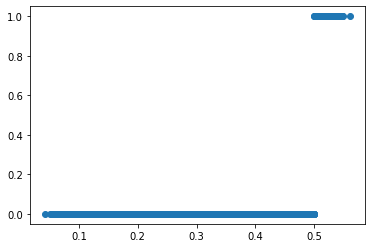

In [52]:
# plotting the predicted value with its probability

plt.scatter(y_pred_probability[:,1], y_train_pred)

### Logit Model 2

In [53]:
# getting our X variables for our model

x_var2 = x_train_scaled.drop(columns = [ 'Age', 'Tenure', 'Balance', 'EstimatedSalary'])

# creating our model

logit2 = LogisticRegression(random_state = 125, C = 0.1)


# fitting our model

logit2 = logit2.fit(x_var2, y_train)


# predicting y value using our model

y_train_pred2 = logit2.predict(x_var2)



# getting classification report

print(classification_report( y_train, y_train_pred2))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      5754
           1       0.54      0.02      0.04      1471

    accuracy                           0.80      7225
   macro avg       0.67      0.51      0.46      7225
weighted avg       0.75      0.80      0.71      7225



In [54]:
# getting the prediction probability


y_pred2_probability = logit2.predict_proba(x_var2)


y_pred2_probability

array([[0.81274525, 0.18725475],
       [0.84817287, 0.15182713],
       [0.83306399, 0.16693601],
       ...,
       [0.90029001, 0.09970999],
       [0.72642731, 0.27357269],
       [0.90126509, 0.09873491]])

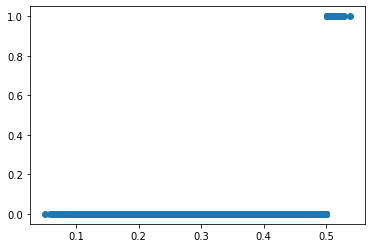

In [55]:
# plotting the predicted value with its probability

plt.scatter(y_pred2_probability[:,1], y_train_pred2)

**Logit Model 1 Accuracy is 80%**

**Logit Model 2 Accuracy is 80%**

###  Now we will create more models with Decision Tress, KNN, and Random Forest

## Decision Trees

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
# getting our X variables for our model

x_var3 = x_train_scaled.drop(columns = [ 'Age', 'Tenure', 'Balance', 'EstimatedSalary'])

# creating our model with max_depth of 10
clf1 = DecisionTreeClassifier( max_depth = 10, random_state = 123)

print(clf1)
# fitting our model

clf1.fit(x_var3, y_train)



# predicting y value using our model
y_train_pred3 = clf1.predict(x_var3)

# getting classification report
print(classification_report(y_train, y_train_pred3))


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      5754
           1       0.74      0.38      0.50      1471

    accuracy                           0.85      7225
   macro avg       0.80      0.67      0.70      7225
weighted avg       0.83      0.85      0.83      7225



**Decision Tree model accuracy is 85%**

## K Nearest Neighbors

In [58]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

In [59]:
# getting our X variables for our model

x_var4 = x_train_scaled.drop(columns = [ 'Age', 'Tenure', 'Balance', 'EstimatedSalary'])


# creating our model object
knn1 = KNeighborsClassifier(n_neighbors = 10)

# fitting our model
knn1.fit(x_var4, y_train)



# predicting y value using our model
y_train_pred4 = knn1.predict(x_var4)


# getting classification report
print(classification_report(y_train, y_train_pred4))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      5754
           1       0.72      0.23      0.35      1471

    accuracy                           0.83      7225
   macro avg       0.78      0.60      0.63      7225
weighted avg       0.81      0.83      0.79      7225



**KNN Model accuracy is 83%**

## Random Forest

In [60]:
# getting our X variables for our model

x_var5 = x_train_scaled.drop(columns = [ 'Age', 'Tenure', 'Balance', 'EstimatedSalary'])


# creating our model object
rf = RandomForestClassifier(max_depth = 7, random_state = 132)

# fitting our model
rf.fit(x_var5, y_train)



# predicting y value using our model
y_train_pred5 = rf.predict(x_var5)


# getting classification report
print(classification_report(y_train, y_train_pred5))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      5754
           1       0.81      0.23      0.36      1471

    accuracy                           0.83      7225
   macro avg       0.82      0.61      0.63      7225
weighted avg       0.83      0.83      0.79      7225



**Random Forest Model Accuracy is 83%**

## Lets Validate Our Models
**We will validate with one of the logit model, a decision tree model, random forest model, and a k nearest neighbors**

In [61]:
# logit model validation
validate_x_var = x_validate_scaled.drop(columns = [ 'Age', 'Tenure', 'Balance', 'EstimatedSalary'])

y_validate = validate[['Exited']]

In [63]:
y_validate_pred1 = logit.predict(validate_x_var)

In [64]:
print(classification_report(y_validate, y_validate_pred1))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      1015
           1       0.65      0.05      0.09       260

    accuracy                           0.80      1275
   macro avg       0.73      0.52      0.49      1275
weighted avg       0.77      0.80      0.73      1275



In [66]:
# validate with decision tree
y_validate_pred2 = clf1.predict(validate_x_var)

print(classification_report(y_validate, y_validate_pred2))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1015
           1       0.58      0.30      0.40       260

    accuracy                           0.81      1275
   macro avg       0.71      0.62      0.64      1275
weighted avg       0.79      0.81      0.79      1275



In [67]:
# validate with knn
y_validate_pred3 = knn1.predict(validate_x_var)

print(classification_report(y_validate, y_validate_pred3))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1015
           1       0.59      0.19      0.29       260

    accuracy                           0.81      1275
   macro avg       0.71      0.58      0.59      1275
weighted avg       0.78      0.81      0.77      1275



In [68]:
# validate with random forest
y_validate_pred4 = rf.predict(validate_x_var)


print(classification_report(y_validate, y_validate_pred4))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1015
           1       0.73      0.22      0.33       260

    accuracy                           0.82      1275
   macro avg       0.78      0.60      0.62      1275
weighted avg       0.81      0.82      0.78      1275



**Out of all the models, Random Forest has better overall classification report**

**So, we will test with this model**

In [70]:

# getting our x and y variables
x_test = x_test_scaled.drop(columns = [ 'Age', 'Tenure', 'Balance', 'EstimatedSalary'])
y_test = test[['Exited']]

# predicting with our selected model
y_test_pred = rf.predict(x_test)


# getting the classification report

print(classification_report(y_test, y_test_pred))

accuracy = rf.score(x_test, y_test)

print(accuracy)

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1194
           1       0.72      0.20      0.31       306

    accuracy                           0.82      1500
   macro avg       0.77      0.59      0.60      1500
weighted avg       0.81      0.82      0.78      1500

0.8206666666666667


**The accuracy of our model is 82% which is slightly better than our baseline model accuracy of 80%**